In [1]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     

from tensorflow import keras
from sklearn.preprocessing import StandardScaler 
#import plotly.graph_objects as go

from sklearn.ensemble import IsolationForest  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 
import seaborn as sns #visualisation
  

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV  

In [3]:
# import data set from the local driver 
dff=pd.read_csv('SWaT_Dataset_Normal_v0.csv')#, parse_dates = ['Timestamp'], index_col = 'Timestamp') 
df=pd.read_csv('SWaT_Dataset_Attack_v0 - Copy.csv')#, parse_dates = ['Timestamp'], index_col = 'Timestamp')
frames = [dff,df] 
df_concat=pd.concat(frames) 
df_concat.head(5)   

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


#### Automatic Sensor data extraction 

In [4]:
# df_concat.filter(regex=('^PIT' and '^LIT') ,axis=1).head() 
df1=df_concat.filter(regex='(^Time|^PIT|^AIT|^FIT|^DPI|^LIT|^Norma)',axis=1)#.head()
df1.head()

,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,244.3284,8.19008,306.101,2.467305,20.84320,2.233354,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,244.3284,8.19008,306.101,2.466536,20.84320,2.233354,327.2799,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,244.4245,8.19008,306.101,2.466536,20.84320,2.233354,327.1597,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal


In [5]:
# Convert timestamp to datetime format 
df1['Timestamp'] = pd.to_datetime(df1['Timestamp']) 

# # df1.shape

#df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
#df1 = df1.set_index('Timestamp').resample('H').mean().reset_index()
# df1.shape
df1.head() 

/tmp/ipykernel_233998/2863054680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])


,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,Normal/Attack
0,2015-12-22 16:00:00,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
1,2015-12-22 16:00:01,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
2,2015-12-22 16:00:02,2.439548,260.9131,244.3284,8.19008,306.101,2.467305,20.84320,2.233354,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
3,2015-12-22 16:00:03,2.428338,260.2850,244.3284,8.19008,306.101,2.466536,20.84320,2.233354,327.2799,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
4,2015-12-22 16:00:04,2.424815,259.8925,244.4245,8.19008,306.101,2.466536,20.84320,2.233354,327.1597,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal


In [6]:
# remove the space on Normal/Attack columns 
df1['Normal/Attack'] = df1['Normal/Attack'].str.replace(' ', '')  
#To see how the data is spread betwen Attack and Normal 
print(df1.groupby('Normal/Attack')['Normal/Attack'].count())  
# Rename the col name Normal/Attack with A   
df1.rename(columns = {'Normal/Attack':'A'}, inplace = True)
df1.head(2)  
  

Normal/Attack
Attack     54621
Normal    892098
Name: Normal/Attack, dtype: int64


/tmp/ipykernel_233998/2059848264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Normal/Attack'] = df1['Normal/Attack'].str.replace(' ', '')
/tmp/ipykernel_233998/2059848264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'Normal/Attack':'A'}, inplace = True)


,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,2015-12-22 16:00:00,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
1,2015-12-22 16:00:01,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal


In [7]:
# Convert non-numeric class to numeric

df1.A[df1.A== 'Normal'] = 0 
df1.A[df1.A == 'Attack'] = 1    
df1.head() 

/tmp/ipykernel_233998/447421140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A== 'Normal'] = 0
/tmp/ipykernel_233998/447421140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A== 'Normal'] = 0
/tmp/ipykernel_233998/447421140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A == 'Attack'] = 1
/tmp/ipykernel_233998/447421140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,2015-12-22 16:00:00,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0
1,2015-12-22 16:00:01,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0
2,2015-12-22 16:00:02,2.439548,260.9131,244.3284,8.19008,306.101,2.467305,20.84320,2.233354,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0
3,2015-12-22 16:00:03,2.428338,260.2850,244.3284,8.19008,306.101,2.466536,20.84320,2.233354,327.2799,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0
4,2015-12-22 16:00:04,2.424815,259.8925,244.4245,8.19008,306.101,2.466536,20.84320,2.233354,327.1597,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0


In [8]:
# make the class as float 
df1['A'] = df1['A'].astype('float')  

/tmp/ipykernel_233998/182210225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['A'] = df1['A'].astype('float')


In [9]:
# aTimestamp as index 
df1= df1.set_index('Timestamp') 
df1.head()

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:01,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:02,2.439548,260.9131,244.3284,8.19008,306.101,2.467305,20.84320,2.233354,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:03,2.428338,260.2850,244.3284,8.19008,306.101,2.466536,20.84320,2.233354,327.2799,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:04,2.424815,259.8925,244.4245,8.19008,306.101,2.466536,20.84320,2.233354,327.1597,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0


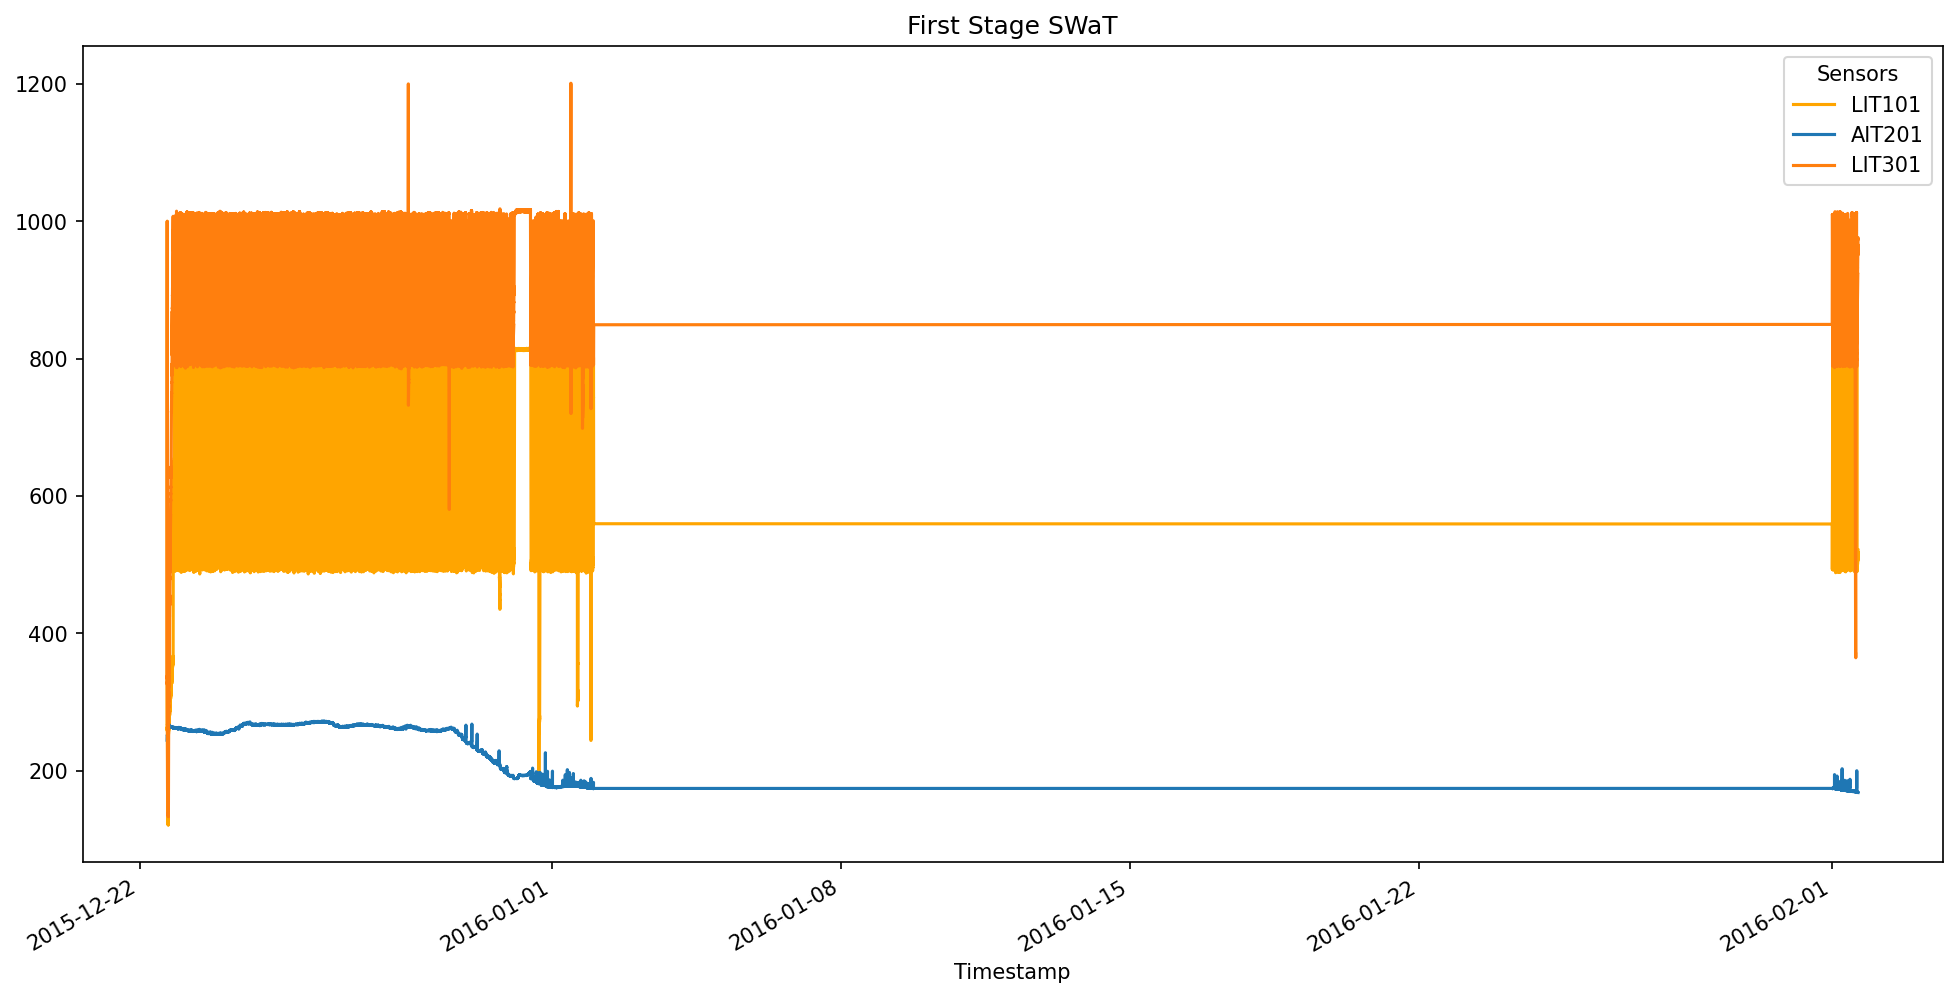

In [10]:
# code
# Visualizing The first stage with respect to time series 
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.

df1['LIT101'].plot(label='LIT101', color='orange')
df1['AIT201'].plot(label='AIT201')

df1['LIT301'].plot(label='LIT301')

#df1.plot(subplots=True) 
  
# adding title to the plot
plt.title('First Stage SWaT')
  
# adding Label to the x-axis
plt.xlabel('Timestamp')
  
# adding legend to the curve
#plt.legend()
plt.legend(title='Sensors')
 

#### Exploratory Data Analysis

In [11]:
#If there are missing entries, drop them.
df1.dropna(inplace=True)#,axis=1)  
# Total number of rows and columns 
df1.shape  

(946719, 26)

In [12]:
# Dropping the duplicates 
df1= df1.drop_duplicates()
df1.head(2)    

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:01,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0


In [13]:
# Counting the number of rows after removing duplicates.
df1.shape  

(928898, 26)

<AxesSubplot:>

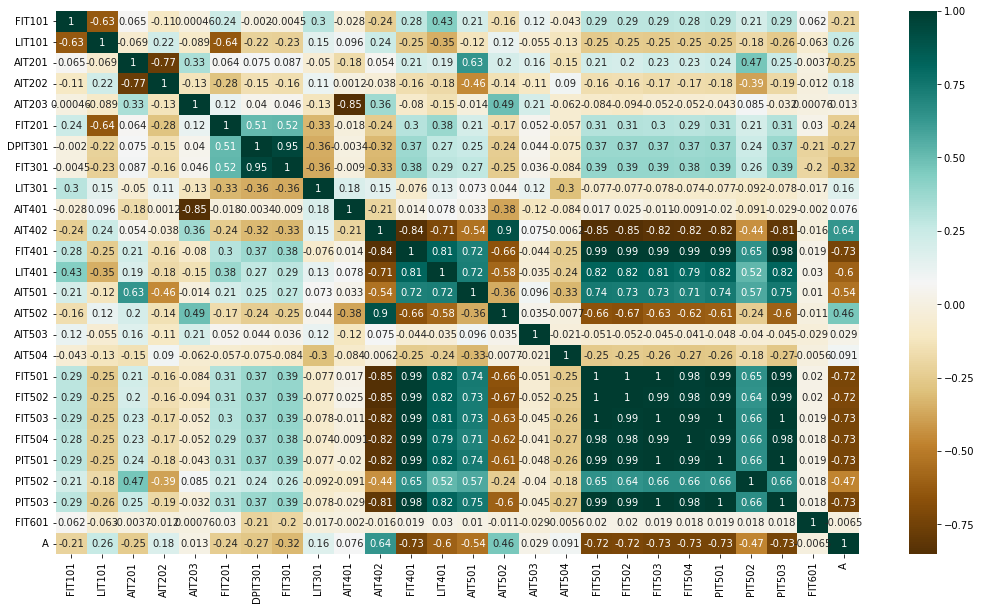

In [449]:
# Finding the relations between the variables using the correlation 
plt.figure(figsize=(18,10))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
#c   

In [14]:
#To see how the data is spread betwen Attack and Normal 
#print(df1.groupby('Normal/Attack')['Normal/Attack'].count()) 
print(df1.groupby('A')['A'].count())  

A
0.0    875250
1.0     53648
Name: A, dtype: int64


#### Visualize the dataset 
-  Plotting the number of normal and Attack transactions in the dataset. 

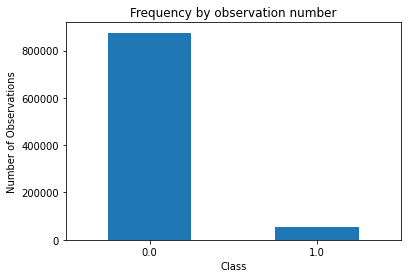

In [15]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(df1['A'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1['A'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");  

#### Normalize using min Max scaler  

In [16]:
# # For content length, use the Min max Scalar.  
# from sklearn.preprocessing import MinMaxScaler 

con_feats = ['FIT101','LIT101','AIT201','AIT202','AIT203','FIT201','DPIT301','FIT301','FIT301','LIT301','AIT401',
            'AIT402','FIT401','LIT401','AIT501','AIT502','AIT503','AIT504','FIT501','FIT502','FIT503','FIT504',
            'PIT501','PIT502','PIT503','FIT601'] 
scaler = MinMaxScaler() 
df1[con_feats] = scaler.fit_transform(df1[con_feats])
df1.head()  

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,0.894987,0.160292,0.730144,0.732892,0.073596,0.874201,0.462186,0.940694,0.182199,0.0,...,0.012283,0.000948,0.001035,0.002179,0.0,0.004448,0.0,0.005921,0.000142,0.0
2015-12-22 16:00:01,0.890230,0.159845,0.730144,0.732892,0.073596,0.873249,0.462186,0.940371,0.182199,0.0,...,0.012283,0.000948,0.001035,0.002179,0.0,0.004448,0.0,0.005921,0.000142,0.0
2015-12-22 16:00:02,0.883848,0.159533,0.730144,0.732892,0.073596,0.872796,0.463182,0.939886,0.182199,0.0,...,0.012283,0.000948,0.001035,0.002179,0.0,0.004448,0.0,0.005921,0.000142,0.0
2015-12-22 16:00:03,0.879786,0.158819,0.730144,0.732892,0.073596,0.872524,0.463182,0.939886,0.182049,0.0,...,0.012283,0.000948,0.001035,0.002179,0.0,0.004448,0.0,0.005921,0.000142,0.0
2015-12-22 16:00:04,0.878510,0.158372,0.731064,0.732892,0.073596,0.872524,0.463182,0.939886,0.181936,0.0,...,0.012283,0.000948,0.001035,0.002179,0.0,0.004448,0.0,0.005921,0.000142,0.0


In [17]:
# # sample 
# df1=df1.sample(frac=0.1, replace=True, random_state=1) 

In [18]:
# # # Remove two columns name is 'C' and 'D'
# df1=df1.drop(['Timestamp'], axis=1)  

#### Split the Data to train and Test

In [19]:
# Train test split (80/20 %) 
X_train, X_test, y_train, y_test = train_test_split(df1,df1['A'],test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])


The number of records in the training dataset is 743118
The number of records in the test dataset is 185780


In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(743118, 26)
(185780, 26)
(743118,)
(185780,)


#### Hyperparameter tuning for 1second logs using Isolation forest  

In [457]:
from sklearn import model_selection 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer, f1_score 
clf = IsolationForest(random_state=47)

param_grid = {'n_estimators': [5,10,20,30,40],#list(range(100, 800)),#, 5)), 
              'max_samples': [5,10,20,30,40], #list(range(100, 500)),#, 5)), 
              'contamination': [0.1, 0.2, 0.3, 0.4],# 0.5], 
              'max_features': [5,10,15], 
              #'bootstrap': [True, False], 
              #'n_jobs': [5, 10, 20, 30]
             }

f1sc = make_scorer(f1_score, average='micro')

grid_search = model_selection.GridSearchCV(clf, 
                                                 param_grid,                                                  
                                                 refit=True,
                                                 scoring=f1sc,
                                                 cv=10, 
                                                 return_train_score=True)
#grid_dt_estimator.fit(X_train, X_test)

best_model = grid_search.fit(X_train.values, y_train) 

print('Optimum parameters', best_model.best_params_)   

Optimum parameters {'contamination': 0.1, 'max_features': 10, 'max_samples': 5, 'n_estimators': 5}


#### Train Isolation Forest Model 

In [21]:
# Model and performance
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [22]:
# Train the isolation forest model
if_model = IsolationForest(n_estimators=10,max_samples=15,contamination=0.1,random_state=47).fit(X_train)
# Predict the anomalies
if_prediction = if_model.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
if_prediction = [1 if i==-1 else 0 for i in if_prediction]


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


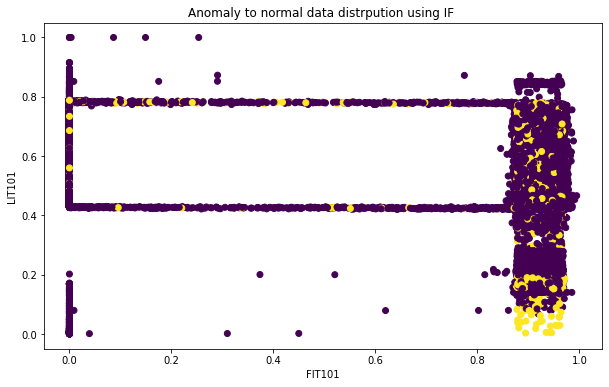

In [23]:
# visualize the anomaly points in the dataset with 2D
plt.figure(figsize=(10,6)) 
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=if_prediction)
plt.title("Anomaly to normal data distrpution using IF ")
plt.xlabel("FIT101")
plt.ylabel("LIT101")
plt.show()

#### Determine anomaly score and identify anomalies 

In [30]:
result = X_test.copy()
result['scores'] = if_model.decision_function(X_test)
result['anomaly'] = if_model.predict(X_test)
result['anomaly'] = result['anomaly'].map( {1: 0, -1: 1} )
print(result['anomaly'].value_counts()) 

0    167702
1     18078
Name: anomaly, dtype: int64


In [399]:
result.head()

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A,scores,anomaly
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-30 20:16:14,0.906359,0.432890,0.283962,0.841836,0.152735,0.864228,0.441343,0.927162,0.670225,0.999677,...,0.966895,0.956915,0.968680,0.928773,0.323144,0.923433,0.000036,0.0,0.092103,0
2016-02-01 11:34:00,0.000000,0.456637,0.018093,0.900598,0.021079,0.000000,0.040407,0.000000,0.822014,0.999645,...,0.953165,0.959598,0.972722,0.934097,0.240175,0.925866,0.000000,1.0,0.008553,0
2015-12-26 02:51:57,0.876537,0.774854,0.972707,0.812241,0.116664,0.000000,0.050010,0.000000,0.821339,0.999677,...,0.921565,0.965633,0.971509,0.953016,0.283843,0.953930,0.000000,0.0,0.048051,0
2015-12-31 09:15:01,0.000000,0.788022,0.241644,0.853953,0.279665,0.000000,0.045173,0.000000,0.825464,0.999677,...,0.000846,0.001341,0.000000,0.003445,0.000000,0.001866,0.000000,1.0,-0.018137,1
2015-12-31 11:50:08,0.931422,0.438559,0.198099,0.834545,0.285117,0.866177,0.443548,0.927647,0.734383,0.999645,...,0.926644,0.965968,0.978986,0.947065,0.262009,0.942494,0.000036,0.0,0.019977,0


In [400]:
# filter anomaly feature which has 1 
anomaly = result.loc[result['anomaly'] == 1]
anomaly.head(5)

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A,scores,anomaly
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-31 09:15:01,0.000000,0.788022,0.241644,0.853953,0.279665,0.000000,0.045173,0.000000,0.825464,0.999677,...,0.000846,0.001341,0.000000,0.003445,0.000000,0.001866,0.000000,1.0,-0.018137,1
2015-12-23 07:26:33,0.000000,0.519531,0.851886,0.983915,0.628475,0.868716,0.444402,0.928995,0.639815,0.000000,...,0.914135,0.975021,0.982623,0.967863,0.279476,0.972017,0.000071,0.0,-0.065411,1
2015-12-22 19:29:05,0.915177,0.279740,0.902790,0.827146,0.504997,0.548756,0.068008,0.175598,0.814365,0.000000,...,0.941126,0.970327,0.979996,0.953329,0.388646,0.956769,0.000071,0.0,-0.006181,1
2015-12-24 15:55:15,0.932235,0.614295,0.965348,0.806236,0.135744,0.000000,0.051077,0.000000,0.822276,0.999677,...,0.898806,0.980721,0.982623,0.976884,0.406114,0.981913,0.000142,0.0,-0.024602,1
2015-12-31 07:36:28,0.000000,0.787040,0.239498,0.861245,0.256133,0.000000,0.044390,0.000000,0.826476,0.999677,...,0.000846,0.001174,0.000000,0.004385,0.000000,0.002352,0.000000,1.0,-0.000209,1


In [401]:
# extract the anomaly points in the form of CSV 
#anomaly.to_csv(r'/home/jovyan/isolationanomalies.csv',index=False)

In [402]:
anomaly_index = list(anomaly.index) 

In [403]:
raw_anomaly = df1.loc[anomaly_index] 

In [404]:
raw_anomaly.head()


,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-31 09:15:01,0.000000,0.788022,0.241644,0.853953,0.279665,0.000000,0.045173,0.000000,0.825464,0.999677,...,0.019176,0.000510,0.000846,0.001341,0.000000,0.003445,0.000000,0.001866,0.000000,1.0
2015-12-23 07:26:33,0.000000,0.519531,0.851886,0.983915,0.628475,0.868716,0.444402,0.928995,0.639815,0.000000,...,0.008130,0.968062,0.914135,0.975021,0.982623,0.967863,0.279476,0.972017,0.000071,0.0
2015-12-22 19:29:05,0.915177,0.279740,0.902790,0.827146,0.504997,0.548756,0.068008,0.175598,0.814365,0.000000,...,0.010163,0.969010,0.941126,0.970327,0.979996,0.953329,0.388646,0.956769,0.000071,0.0
2015-12-24 15:55:15,0.932235,0.614295,0.965348,0.806236,0.135744,0.000000,0.051077,0.000000,0.822276,0.999677,...,0.007511,0.965510,0.898806,0.980721,0.982623,0.976884,0.406114,0.981913,0.000142,0.0
2015-12-31 07:36:28,0.000000,0.787040,0.239498,0.861245,0.256133,0.000000,0.044390,0.000000,0.826476,0.999677,...,0.018735,0.000510,0.000846,0.001174,0.000000,0.004385,0.000000,0.002352,0.000000,1.0


In [405]:
#  counts of all unique value  in FIT101 
df1["FIT101"].value_counts()

0.000000    274664
0.879322      2726
0.879438      2620
0.879670      2515
0.879786      2233
             ...  
0.741007         1
0.726038         1
0.632745         1
0.506150         1
0.687050         1
Name: FIT101, Length: 3953, dtype: int64

In [406]:
# count Anomalies unique values in FIT101 
raw_anomaly["FIT101"].value_counts() 
#raw_anomaly["FIT101"].value_counts().sort_values().plot(kind = 'barh') 

0.000000    7418
0.922836      61
0.923184      55
0.879670      50
0.921675      47
            ... 
0.032258       1
0.180552       1
0.133790       1
0.299141       1
0.871664       1
Name: FIT101, Length: 779, dtype: int64

In [407]:
# count Anomalies unique values in LIT101 
raw_anomaly["LIT101"].value_counts() 

0.787487    151
0.788290    149
0.787531    148
0.787576    148
0.787621    143
           ... 
0.666253      1
0.675983      1
0.565239      1
0.763918      1
0.560061      1
Name: LIT101, Length: 5252, dtype: int64

In [408]:
raw_anomaly["AIT202"].value_counts() 


0.807845    154
0.808274    153
0.806772    150
0.808488    148
0.806987    145
           ... 
0.930622      1
0.961076      1
0.960647      1
0.820820      1
0.825752      1
Name: AIT202, Length: 1133, dtype: int64

#### perfomance evalution using RMSE 

In [409]:
# Define a function to calculate MAE and RMSE
errors = if_prediction - y_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('The performance  of isolation forest'+ ':') 
print('')
print('Mean Absolute Error: {:.4f}'.format(mae)) 
print('Mean Square Error:{:.4f}' .format(mse))
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('') 

The performance  of autoencoder:

Mean Absolute Error: 0.1249
Mean Square Error:0.1249
Root Mean Square Error: 0.3534



#### Confusion matrix  

In [410]:
# Check the model performance
print(classification_report(y_test, if_prediction)) 

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93    175052
         1.0       0.15      0.26      0.19     10728

    accuracy                           0.88    185780
   macro avg       0.55      0.59      0.56    185780
weighted avg       0.91      0.88      0.89    185780

